# GRADIENT BOOSTING FOR REGRESSION (Q2)
- we implement this algorithm from scratch using decision stumps
- the following loss functions are used : squared and absolute loss

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# dataset generation
# Set seed for reproducibility
np.random.seed(42)
x = np.random.uniform(0, 1, 100)
noise = np.random.normal(0, np.sqrt(0.01), 100)
y = np.sin(2 * np.pi * x) + np.cos(2 * np.pi * x) + noise

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [3]:
class DecisionStump:
    def __init__(self):
        self.threshold = None
        self.left_value = None
        self.right_value = None

    def fit(self, x, y):
        x = x.flatten()
        best_loss = float('inf')
        best_thresh = None
        best_left_val = None
        best_right_val = None

        thresholds = np.linspace(0, 1, 20)

        for thresh in thresholds:
            left_mask = x <= thresh
            right_mask = x > thresh

            if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
                continue
            
            left_val = np.mean(y[left_mask])
            right_val = np.mean(y[right_mask])

            preds = np.where(x <= thresh, left_val, right_val)
            loss = np.mean((y - preds)**2)

            if loss < best_loss:
                best_loss = loss
                best_thresh = thresh
                best_left_val = left_val
                best_right_val = right_val

        self.threshold = best_thresh
        self.left_value = best_left_val
        self.right_value = best_right_val

    def predict(self, x):
        x = x.flatten()
        return np.where(x <= self.threshold, self.left_value, self.right_value)

def gradient_boosting(x_train, y_train, x_test, y_test, loss='squared', iterations=100, eta=0.01):
    F_train = np.zeros_like(y_train)
    F_test = np.zeros_like(y_test)
    train_losses = []

    for t in range(iterations):
        if loss == 'squared':
            grad = y_train - F_train
        elif loss == 'absolute':
            grad = np.sign(y_train - F_train)

        stump = DecisionStump()
        stump.fit(x_train, grad)
        update = stump.predict(x_train)
        F_train += eta * update
        F_test += eta * stump.predict(x_test)

        if loss == 'squared':
            train_loss = np.mean((y_train - F_train) ** 2)
        elif loss == 'absolute':
            train_loss = np.mean(np.abs(y_train - F_train))

        train_losses.append(train_loss)

    return F_train, F_test, train_losses

## Plotting For squared and absolute loss

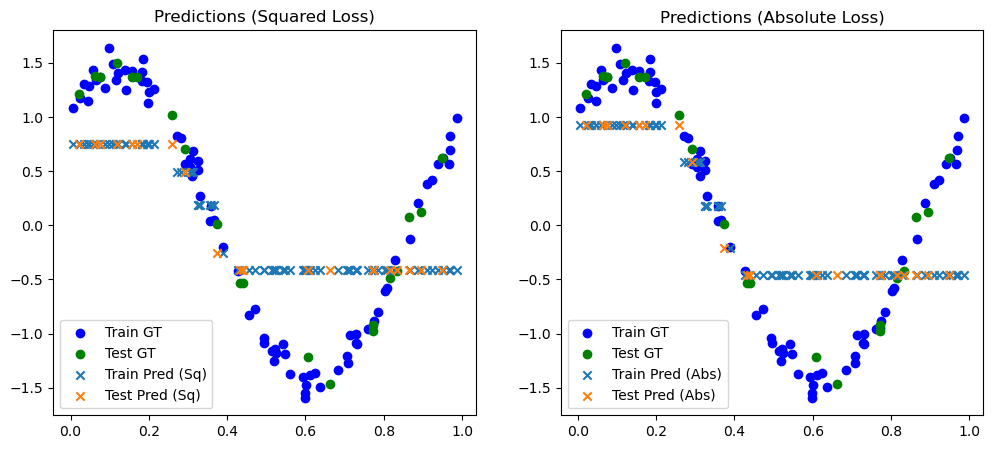

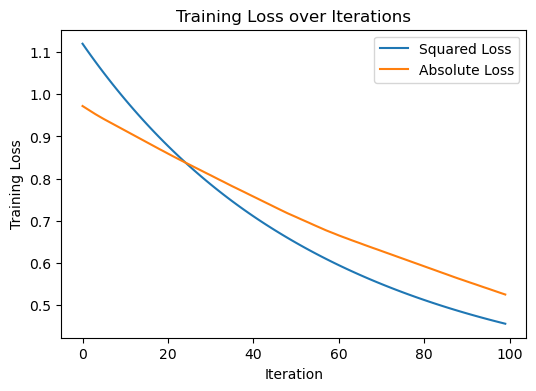

In [4]:
F_train_sq, F_test_sq, losses_sq = gradient_boosting(x_train, y_train, x_test, y_test, 'squared')
F_train_abs, F_test_abs, losses_abs = gradient_boosting(x_train, y_train, x_test, y_test, 'absolute')

#Plot Predictions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train, label='Train GT', color='blue')
plt.scatter(x_test, y_test, label='Test GT', color='green')
plt.scatter(x_train, F_train_sq, label='Train Pred (Sq)', marker='x')
plt.scatter(x_test, F_test_sq, label='Test Pred (Sq)', marker='x')
plt.title("Predictions (Squared Loss)")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, label='Train GT', color='blue')
plt.scatter(x_test, y_test, label='Test GT', color='green')
plt.scatter(x_train, F_train_abs, label='Train Pred (Abs)', marker='x')
plt.scatter(x_test, F_test_abs, label='Test Pred (Abs)', marker='x')
plt.title("Predictions (Absolute Loss)")
plt.legend()
plt.show()

#Plot Training Loss
plt.figure(figsize=(6, 4))
plt.plot(losses_sq, label="Squared Loss")
plt.plot(losses_abs, label="Absolute Loss")
plt.xlabel("Iteration")
plt.ylabel("Training Loss")
plt.title("Training Loss over Iterations")
plt.legend()
plt.show()


# IMPLEMENTING SIMPLE BINARY CLASSIFIER NEURAL NETWORK (Q3)

In [5]:
# Set random seed for reproducibility
np.random.seed(44)
mean0 = np.array([-1, -1])
mean1 = np.array([1, 1])
cov = np.eye(2)
X0 = np.random.multivariate_normal(mean0, cov, 10)
X1 = np.random.multivariate_normal(mean1, cov, 10)

# Labels
y0 = np.zeros(10)
y1 = np.ones(10)
X = np.vstack((X0, X1))
y = np.concatenate((y0, y1))

# Split into train (50%) and test (50%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=42)
print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)


Train shape: (10, 2) (10,)
Test shape: (10, 2) (10,)


In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
def sigmoid_der(sig):
    return sig*(1-sig)

In [7]:
np.random.seed(46)
# random initializing weights
w1 = np.random.randn(1, 2)
b1 = np.random.randn(1)
w2 = np.random.randn(1)
b2 = np.random.randn(1)

### Running neural network (forward + back prop)

In [8]:
learning_rate = 0.1
total_loss = 0
for i in range(len(X_train)):
    x = X_train[i].reshape(1,2)
    y = y_train[i]
    # forward pass
    z1 = np.dot(w1,x.T) + b1
    a1 = sigmoid(z1)
    y_pred = np.dot(w2,a1) + b2
    #loss
    loss = 0.5 *( (y_pred-y)**2)
    total_loss+=loss
    
    #update using GD
    dL_db2 = y_pred - y
    dL_dw2 = (y_pred-y) * a1
    dL_dw1 = (y_pred-y) * w2 * sigmoid_der(a1) * x
    dL_db1 = (y_pred-y) * w2 * sigmoid_der(a1) 
    w2 -= 0.01 * dL_dw2.flatten()
    b2 -= 0.01 * dL_db2.flatten()
    w1 -= 0.01 * dL_dw1.flatten()
    b1 -= 0.01 * dL_db1.flatten()

In [9]:
test_preds = []
for i in range(len(X_test)):
    x = X_test[i].reshape(1, 2)
    z1 = np.dot(w1, x.T) + b1
    a1 = sigmoid(z1)
    y_hat = np.dot(w2, a1) + b2
    test_preds.append(y_hat.item())

test_preds = np.array(test_preds)
test_mse = np.mean((test_preds - y_test)**2)
print(f" Final Test MSE: {test_mse:.4f}")


 Final Test MSE: 0.8200


# ADA BOOST (Q1)

In [10]:
class DecisionStump:
    def __init__(self):
        self.feature_idx = None
        self.threshold = None
        self.polarity = 1  # Determines if samples > threshold are class 1 or -1
    
    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column >= self.threshold] = -1
            
        return predictions


class AdaBoost:
    def __init__(self, n_rounds=200):
        self.n_rounds = n_rounds
        self.stumps = []
        self.betas = []
        self.train_errors = []
        self.val_errors = []
        self.test_errors = []
        self.train_losses = []  # Track training loss
        self.val_losses = []    # Track validation loss
        self.test_losses = []   # Track test loss
    
    def fit(self, X_train, y_train, X_val, y_val, X_test, y_test):
        n_samples, n_features = X_train.shape
        
        # Convert labels to -1 and 1
        y_train = np.where(y_train == 0, -1, 1)
        y_val = np.where(y_val == 0, -1, 1)
        y_test = np.where(y_test == 0, -1, 1)
        
        # Initialize weights uniformly
        w = np.ones(n_samples) / n_samples
        
        for round_num in range(self.n_rounds):
            stump = DecisionStump()
            min_error = float('inf')
            # evaluating best cut along 5 dimensions , choosing 3 cuts uniformly
            for feature_idx in range(n_features):
                feature_values = X_train[:, feature_idx]
                thresholds = np.linspace(np.min(feature_values), np.max(feature_values), 3)
                
                for threshold in thresholds:
                    for polarity in [1, -1]:
                        stump.feature_idx = feature_idx
                        stump.threshold = threshold
                        stump.polarity = polarity
                        predictions = stump.predict(X_train)
                        
                        # Calculate weighted error , weights are already normalized
                        misclassified = w * (predictions != y_train)
                        error = np.sum(misclassified)
                        
                        # Store best stump
                        if error < min_error:
                            min_error = error
                            best_stump = DecisionStump()
                            best_stump.feature_idx = feature_idx
                            best_stump.threshold = threshold
                            best_stump.polarity = polarity
            
            # Calculate beta (classifier weight)
            eps = 1e-10  
            beta = 0.5 * np.log((1 - min_error) / (min_error + eps))
            
            # Updates
            predictions = best_stump.predict(X_train)
            w *= np.exp(-beta * y_train * predictions)
            w /= np.sum(w)  # Normalize weights
            self.stumps.append(best_stump)
            self.betas.append(beta)
            
            # Calculate error and loss
            self._calculate_metrics(X_train, y_train, X_val, y_val, X_test, y_test)
    
    def _calculate_metrics(self, X_train, y_train, X_val, y_val, X_test, y_test):
        # calculating stuff to be plotted
        train_pred = self.predict(X_train)
        train_error = np.mean(train_pred != y_train)
        self.train_errors.append(train_error)
        
        # Validation predictions and error calculation
        val_pred = self.predict(X_val)
        val_error = np.mean(val_pred != y_val)
        self.val_errors.append(val_error)
        
        # Test predictions and error calculation
        test_pred = self.predict(X_test)
        test_error = np.mean(test_pred != y_test)
        self.test_errors.append(test_error)
        
        # Calculate exponential loss for all datasets
        self.train_losses.append(self._exponential_loss(X_train, y_train))
        self.val_losses.append(self._exponential_loss(X_val, y_val))
        self.test_losses.append(self._exponential_loss(X_test, y_test))
    
    def _exponential_loss(self, X, y):
        margin = -y * self.decision_function(X)
        return np.mean(np.exp(np.clip(margin, -500, 500)))  # Exponential loss
    
    def decision_function(self, X):
        stump_preds = np.array([stump.predict(X) for stump in self.stumps])
        betas = np.array(self.betas)
        weighted_preds = np.dot(betas, stump_preds)
        return weighted_preds

    def predict(self, X):
        return np.sign(self.decision_function(X))

In [11]:
# Load and prepare MNIST data
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target

# Filter classes 0 and 1
mask = (y == '0') | (y == '1')
X = X[mask]
y = y[mask].astype(int)

# data splitting
X_0 = X[y == 0]
X_1 = X[y == 1]
y_0 = y[y == 0]
y_1 = y[y == 1]

# 1000 for training
X_train = np.vstack([X_0[:1000], X_1[:1000]])
y_train = np.hstack([y_0[:1000], y_1[:1000]])

# 500 for validation
X_val = np.vstack([X_0[1000:1500], X_1[1000:1500]])
y_val = np.hstack([y_0[1000:1500], y_1[1000:1500]])

# rest for testing
X_test = np.vstack([X_0[1500:], X_1[1500:]])
y_test = np.hstack([y_0[1500:], y_1[1500:]])

# PCA (5)
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

C:\Users\gulat_4p\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [12]:
adaboost = AdaBoost(n_rounds=100)
adaboost.fit(X_train_pca, y_train, X_val_pca, y_val, X_test_pca, y_test)

# Final evaluation
train_pred = adaboost.predict(X_train_pca)
val_pred = adaboost.predict(X_val_pca)
test_pred = adaboost.predict(X_test_pca)

train_acc = accuracy_score(np.where(y_train == 0, -1, 1), train_pred)
val_acc = accuracy_score(np.where(y_val == 0, -1, 1), val_pred)
test_acc = accuracy_score(np.where(y_test == 0, -1, 1), test_pred)

print(f"Training accuracy: {train_acc:.4f}")
print(f"Validation accuracy: {val_acc:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

Training accuracy: 0.9335
Validation accuracy: 0.9380
Test accuracy: 0.9368


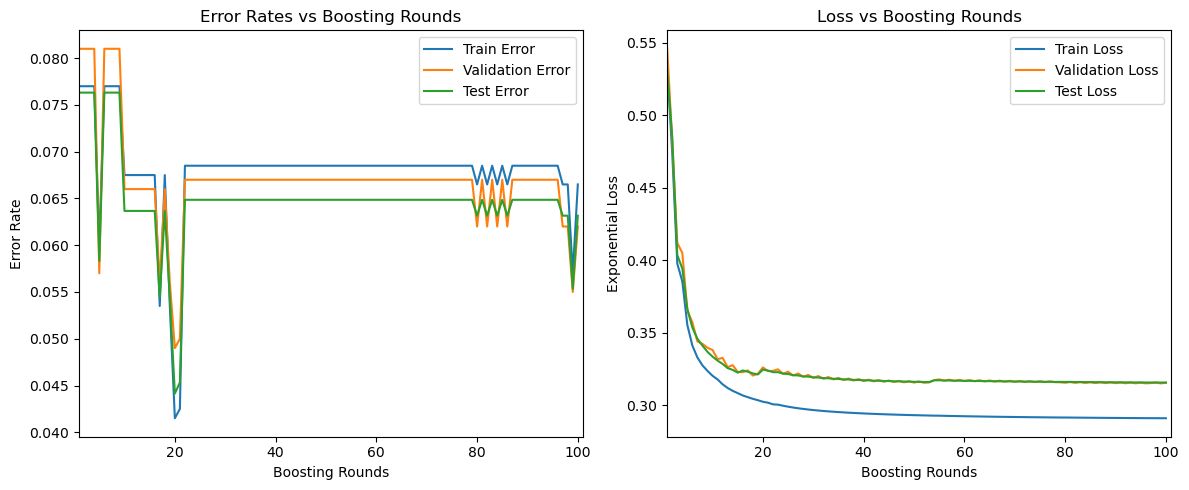

In [13]:
# Plotting
plt.figure(figsize=(12, 5))

# x-axis range now covers all 100 rounds
rounds = range(1, adaboost.n_rounds + 1)

# Plot train/val/test error
plt.subplot(1, 2, 1)
plt.plot(rounds, adaboost.train_errors, label='Train Error')
plt.plot(rounds, adaboost.val_errors, label='Validation Error')
plt.plot(rounds, adaboost.test_errors, label='Test Error')
plt.xlabel('Boosting Rounds')
plt.ylabel('Error Rate')
plt.title('Error Rates vs Boosting Rounds')
plt.legend()
plt.xlim(1, adaboost.n_rounds+1)

# Plot train/val/test loss
plt.subplot(1, 2, 2)
plt.plot(rounds, adaboost.train_losses, label='Train Loss')
plt.plot(rounds, adaboost.val_losses, label='Validation Loss')
plt.plot(rounds, adaboost.test_losses, label='Test Loss')
plt.xlabel('Boosting Rounds')
plt.ylabel('Exponential Loss')
plt.title('Loss vs Boosting Rounds')
plt.legend()
plt.xlim(1, adaboost.n_rounds+1)

plt.tight_layout()
plt.show()
